The goal for this notebook will be two double-panel plots

1. A double-panel plot with percent error curves on the left, squared error curves on the right

2. A double-panel plot with median percent error histogram on the left, median squared error curves on the right

In [14]:
# First, load the emulator of choice
from cassL import train_emu as te
import numpy as np
import matplotlib.pyplot as plt

In [4]:
trainer = te.Emulator_Trainer("../../cassL/emulators/Hnu2direct.cle")

In [7]:
X_test = np.load("../../cassL/data_sets/Hnu2direct/lhc_test_final.npy")
Y_test = np.load("../../cassL/data_sets/Hnu2direct/samples_test.npy")

In [8]:
trainer.test(X_test, Y_test)

Errors computed!
Sum of squared errors across all models: 4922155.54883039


In [9]:
k_axis = np.load("../../cassL/data_sets/k/300k.npy")

In [11]:
square_errors = trainer.get_errors("sqerr")
percent_errors = trainer.get_errors("percent")

Text(0, 0.5, 'Squared Error')

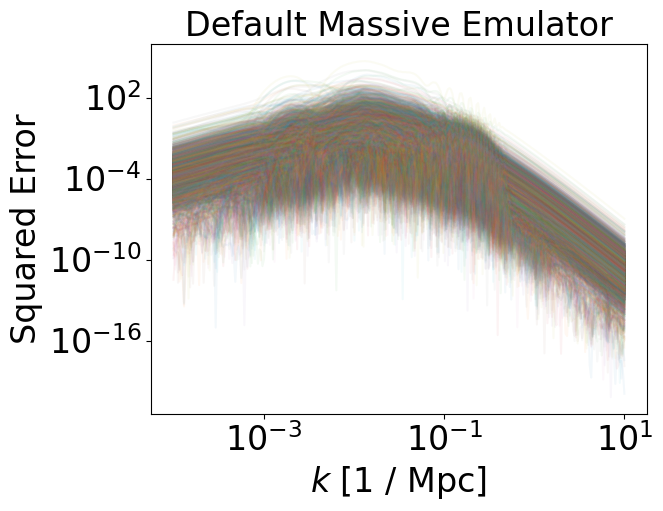

In [29]:
fig = plt.figure()
ax = fig.gca()

for i in range(len(square_errors)):
    ax.loglog(k_axis, square_errors[i], alpha=0.05)
    
ax.tick_params(labelsize=24)

ax.set_title("Default Massive Emulator", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel("Squared Error", fontsize=24)

Text(0, 0.5, 'Percent Error')

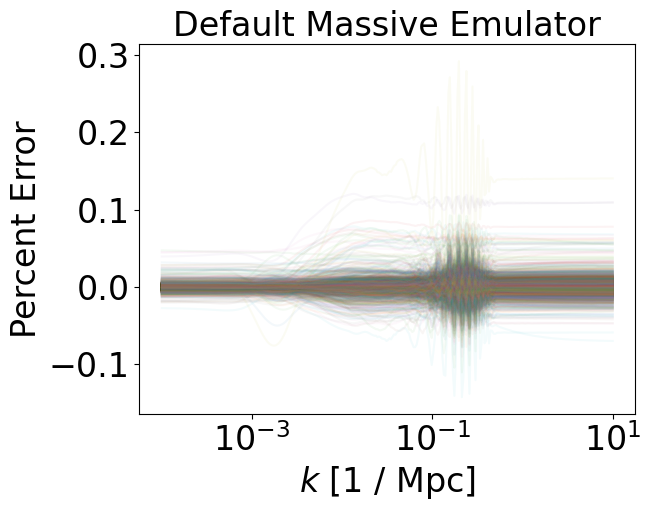

In [31]:
fig = plt.figure()
ax = fig.gca()

for i in range(len(square_errors)):
    ax.plot(k_axis, percent_errors[i], alpha=0.05)
ax.set_xscale('log')

ax.tick_params(labelsize=24)

ax.set_title("Default Massive Emulator", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel("Percent Error", fontsize=24)

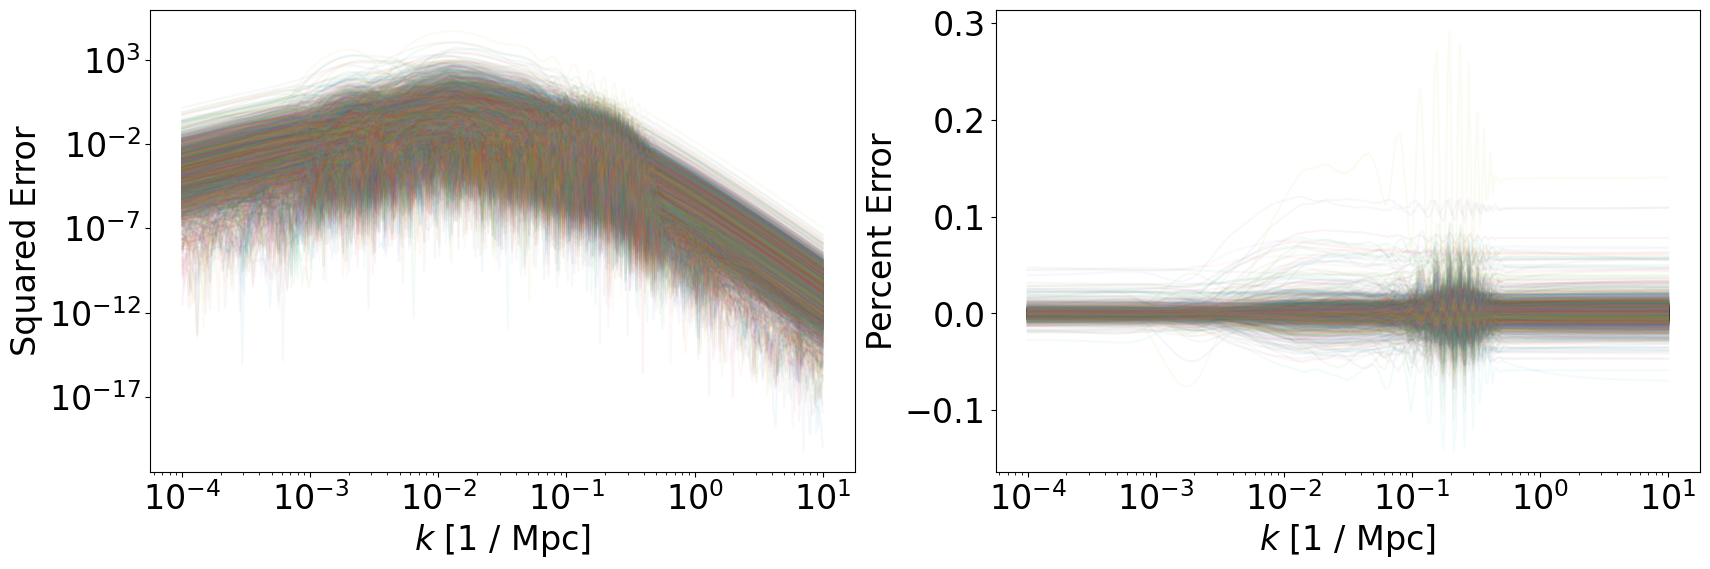

In [48]:
fig, axs = plt.subplots(1, 2, sharex="row", figsize=(20,6))

for i in range(len(square_errors)):
    axs[0].loglog(k_axis, square_errors[i], alpha=0.05)
    axs[1].plot(k_axis, percent_errors[i], alpha=0.05)

axs[0].tick_params(labelsize=24)    
    
#axs[0].set_title("Default Massive Emulator", fontsize=24)
axs[0].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[0].set_ylabel("Squared Error", fontsize=24)    
    
axs[1].set_xscale('log')

axs[1].tick_params(labelsize=24)

#axs[1].set_title("Default Massive Emulator", fontsize=24)
axs[1].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[1].set_ylabel("Percent Error", fontsize=24)

plt.savefig("emu_test.png", bbox_inches="tight")